In [1]:
import pandas as pd
import numpy as np
  
df=pd.read_csv('data1.csv')
'''
for just learning purpose
# train-test splitting

def spli_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size =int(len(data)*test_ratio)
    test_indices=shuffled[: test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set , test_set = spli_train_test(df,0.2)
print(f"rows in train set:{len(train_set)}\nrows in test_set:{len(test_set)}\n")
'''

'\nfor just learning purpose\n# train-test splitting\n\ndef spli_train_test(data, test_ratio):\n    np.random.seed(42)\n    shuffled = np.random.permutation(len(data))\n    test_set_size =int(len(data)*test_ratio)\n    test_indices=shuffled[: test_set_size]\n    train_indices=shuffled[test_set_size:]\n    return data.iloc[train_indices], data.iloc[test_indices]\n\ntrain_set , test_set = spli_train_test(df,0.2)\nprint(f"rows in train set:{len(train_set)}\nrows in test_set:{len(test_set)}\n")\n'

In [2]:
# without wriiting whole function
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
print(f"rows in train set:{len(train_set)}\nrows in test_set:{len(test_set)}\n")

rows in train set:404
rows in test_set:102



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

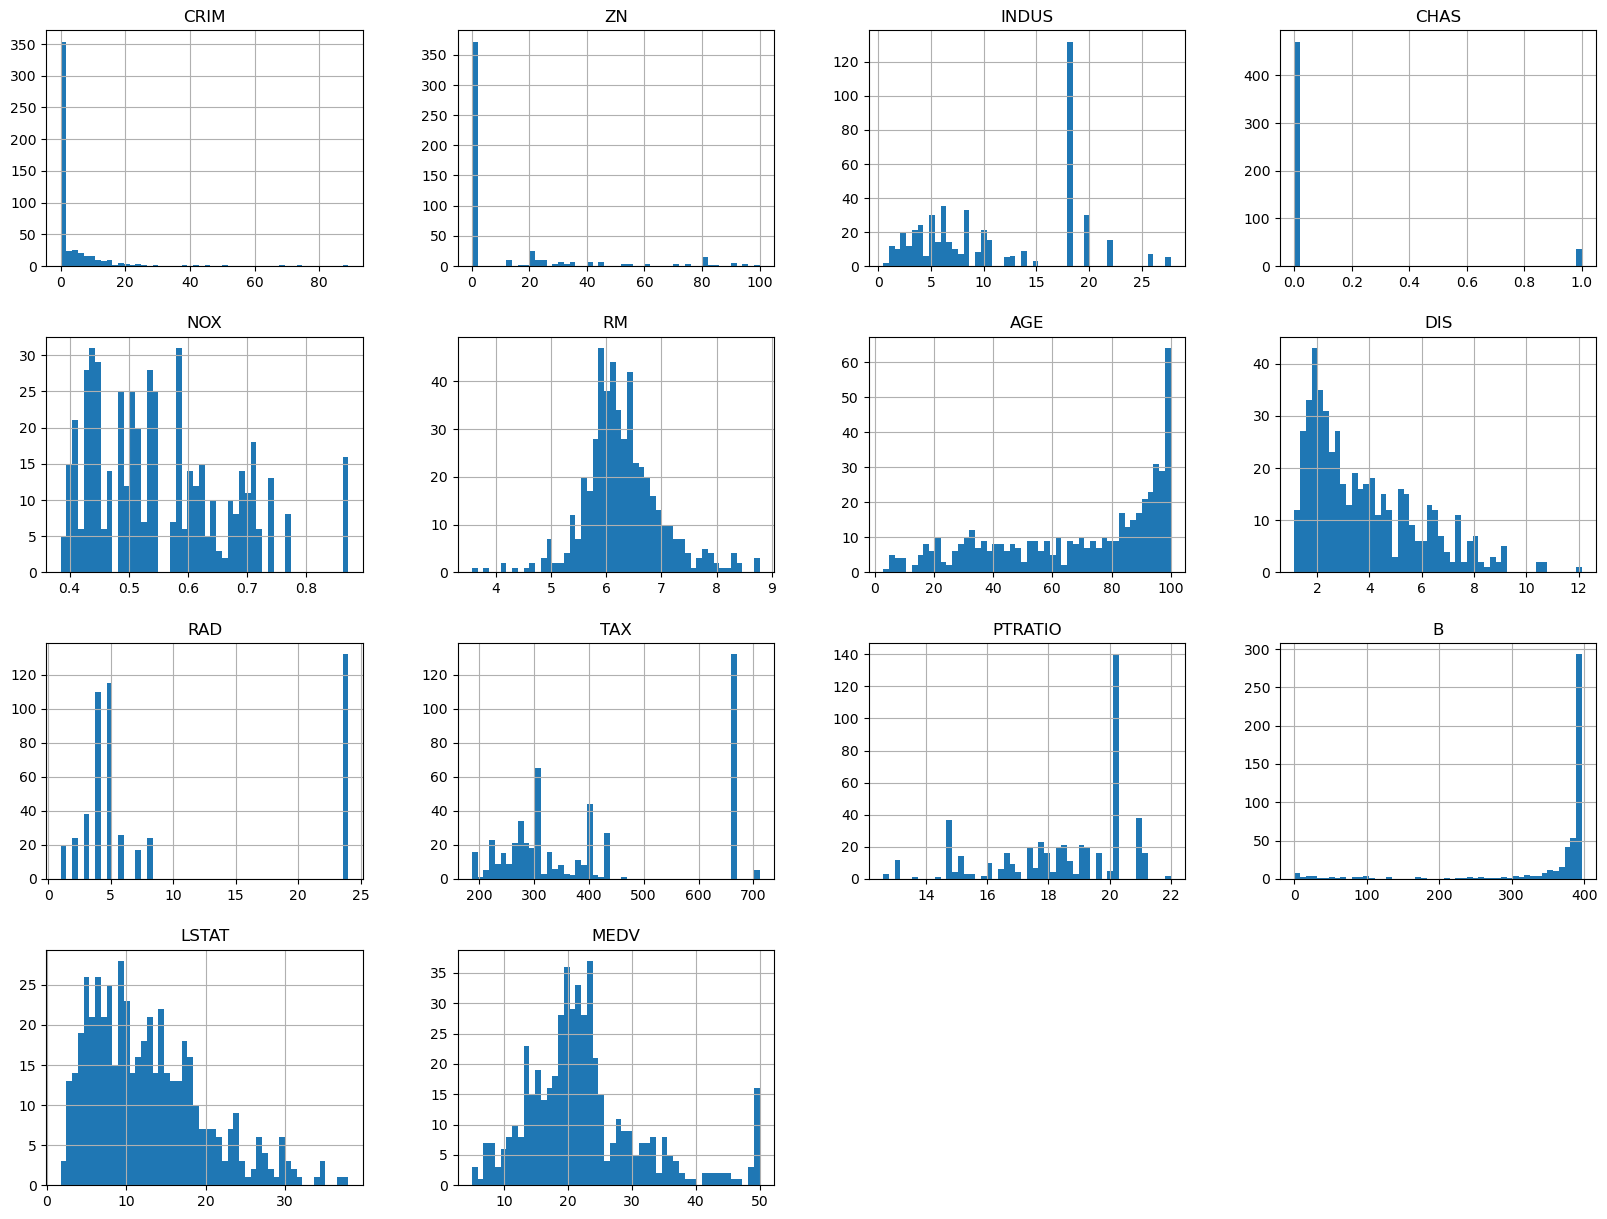

In [4]:
import matplotlib.pyplot as plt

df.hist(bins=50,figsize=(20,15))

## Stratified Shuffle

In [5]:
# stratified shuffle
# suppose CHAS is an important feature , so we need to distribute it in both train and test fairly
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['CHAS']):
    strat_train_set=df.loc[train_index]
    strat_test_set=df.loc[test_index]
                           
   
                        


In [6]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [7]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [8]:
housing = strat_train_set.copy()

## Looking for correlations

In [9]:
corr_matrix=df.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695835
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

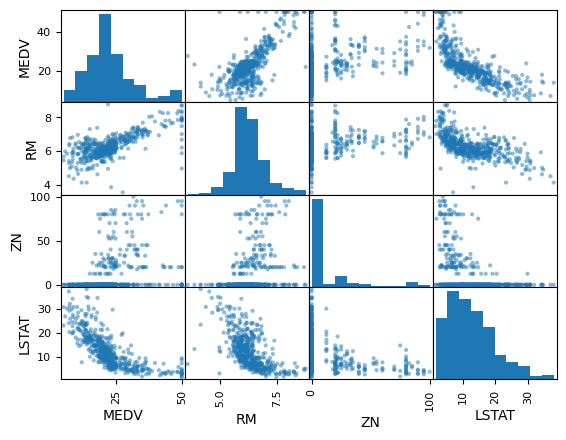

In [10]:
from pandas.plotting import scatter_matrix   
attributes=['MEDV','RM','ZN','LSTAT']
scatter_matrix(df[attributes])

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

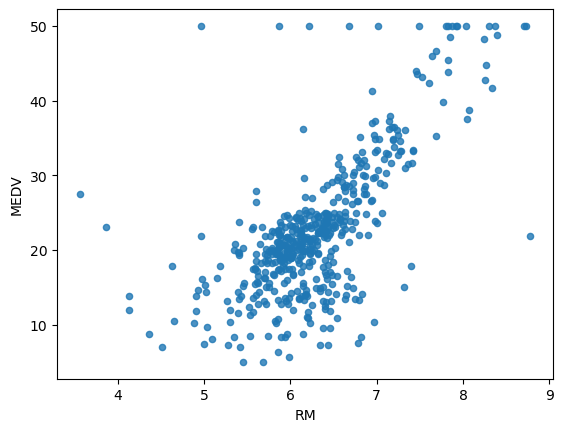

In [11]:
df.plot(kind='scatter',x='RM',y='MEDV',alpha=0.8)

## Attributes combinations

In [12]:
df['TAXRM']=df['TAX']/df['RM']
df['TAXRM']


0      45.019011
1      37.688834
2      33.681280
3      31.723350
4      31.061984
         ...    
501    41.407553
502    44.607843
503    39.134174
504    40.182514
505    45.273632
Name: TAXRM, Length: 506, dtype: float64

In [13]:
corr_matrix=df.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695835
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
TAXRM     -0.540118
LSTAT     -0.737663
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

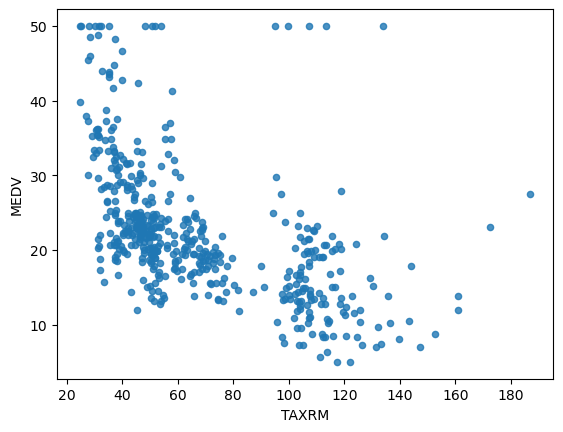

In [14]:
df.plot(kind='scatter', x='TAXRM', y='MEDV', alpha=0.8)

In [15]:
housing_features= strat_train_set.drop("MEDV", axis=1)
housing_labels= strat_train_set["MEDV"].copy()

## Missing Attributes

In [16]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.286902,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,66.897790
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705407,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,31.454409
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,24.645639
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,43.787543
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,53.607897
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.629000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,98.201121
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,187.026116


In [17]:
#to take care of missinng attributes
#1.get rid of missing data points
#2.get rid of whole attribute
#3.set the value to some (0 mean or median )

In [18]:
a=df.dropna(subset=["RM"])# option no. 1
a.shape

(501, 15)

In [19]:
df.drop("RM" , axis=1) # option 2, removes RM attribute
df.shape

(506, 15)

In [20]:
median = df["RM"].median() # option 3, comput median for option 3
median

6.209

In [21]:
df["RM"].fillna(median)

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64

In [22]:
df.shape

(506, 15)

## sklearn already has this class, no need to do all this manualy

In [23]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(df)

SimpleImputer(strategy='median')

In [24]:
imputer.statistics_

array([2.56510000e-01, 0.00000000e+00, 9.69000000e+00, 0.00000000e+00,
       5.38000000e-01, 6.20900000e+00, 7.75000000e+01, 3.20745000e+00,
       5.00000000e+00, 3.30000000e+02, 1.90500000e+01, 3.91440000e+02,
       1.13600000e+01, 2.12000000e+01, 5.36078965e+01])

In [25]:
x=imputer.transform(df)

In [26]:
new_df= pd.DataFrame(x,columns=df.columns)
new_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.286132,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,66.766467
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.701948,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,31.325955
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,24.645639
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887250,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,44.024784
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,53.607897
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,97.919933
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,187.026116


## Scikit-Learn

primarily, three types
1. Estimators - It estimates some parameters  based on a dataset  Eg. imputer
it has fit method and transform method
Fit method- fits the dataset and calculates internal parameter 

2. Transformers- transform method takes input and return output based on the learnig from fit()..
it also has convienince function called fit_transform(), which first fits and then transforms.

3. Predictors- Linearreggression model is an example of predictor, fit(), predict() are two common functions. it also gives score() function which will evaluate the prediction.


## Feature Scaling

two types of feature scaling methods
1. Min Max scaling-
(value-Min)/(Max-Min)
sklearn provides a class called MinMaxScaler for this

2. Standardisation
  (value-Min)/std
  sklearn provides a class StandardScaler for this 

## Creating a Pipelines

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])


In [28]:
new_num_df=my_pipeline .fit_transform(housing_features)
new_num_df.shape

(404, 13)

## Selecting a desired model 

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#model =  LinearRegression()
#model=DecisionTreeRegressor()
model=RandomForestRegressor()
model.fit(new_num_df, housing_labels)


RandomForestRegressor()

In [30]:
some_data = housing_features.iloc[:5]

In [31]:
some_labels =housing_labels.iloc[:5]

In [32]:
prepared_data = my_pipeline.transform(some_data)


In [33]:
model.predict(prepared_data )


array([22.337, 25.024, 16.067, 23.362, 23.471])

In [34]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## evaluating model

In [35]:
import numpy as np
from sklearn.metrics import mean_squared_error

housing_predictions = model.predict(new_num_df)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse=np.sqrt(mse)

In [36]:
mse

1.608953383663364

In [37]:
rmse

1.2684452623835858

## using better evaluation technique- cross validation

In [38]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model, new_num_df, housing_labels,scoring="neg_mean_squared_error", cv=10)
rmse_score=np.sqrt(-score)


In [39]:
rmse_score

array([2.75601415, 2.93606956, 4.3947686 , 2.55288178, 3.37595596,
       2.77950732, 4.8307721 , 3.32497123, 3.32451297, 3.19176956])

In [40]:
def print_scores(scores):
    print("scores:", scores )
    print("Mean:", scores.mean() )
    print("Standard deviation:", scores.std() )

In [41]:
print_scores(rmse_score)

scores: [2.75601415 2.93606956 4.3947686  2.55288178 3.37595596 2.77950732
 4.8307721  3.32497123 3.32451297 3.19176956]
Mean: 3.3467223223239104
Standard deviation: 0.6925405097355022


## dumbing data using joblib - Saving the model

In [42]:
from joblib import dump, load
dump(model, "dragon.joblib")

['dragon.joblib']

## Testing the model on test data

In [47]:
x_test= strat_test_set.drop("MEDV" , axis=1)
y_test= strat_test_set["MEDV"].copy()
x_test_prepared= my_pipeline.transform(x_test)
final_predictions=model.predict(x_test_prepared)
final_mse=mean_squared_error(y_test, final_predictions)
final_rmse=np.sqrt(final_mse)
print(list(final_predictions))
print(" ")
print(list(y_test))

[24.602999999999987, 11.449999999999994, 25.622999999999998, 21.790000000000013, 18.586999999999993, 15.168999999999999, 20.092000000000006, 14.285000000000002, 32.483999999999995, 42.359000000000016, 19.92200000000001, 11.059999999999986, 23.653999999999996, 29.481999999999992, 19.420000000000005, 11.165999999999991, 32.007, 14.526, 23.63399999999997, 18.438999999999997, 19.932999999999986, 18.012000000000004, 19.384999999999998, 21.592999999999996, 17.991999999999997, 30.843000000000007, 16.19499999999999, 32.860000000000014, 8.807999999999998, 33.62299999999999, 24.047999999999988, 21.27, 22.87099999999999, 10.64499999999999, 21.112999999999996, 11.160000000000002, 43.11000000000003, 24.314999999999994, 23.643000000000008, 41.678000000000026, 23.794000000000004, 31.194000000000006, 20.713, 20.70500000000001, 19.29999999999999, 33.436, 44.20200000000004, 19.902, 20.750999999999994, 21.951999999999988, 20.946999999999992, 14.703999999999999, 21.14400000000001, 15.007999999999996, 25.0

In [44]:
final_rmse

3.0092592632947874